# Introduction
  In the United States, a stroke occurs (on average) every 40 seconds and someone dies from a stroke every 4 minutes [1]. Since strokes are a frequent occurrence, it’s important to identify those at risk of having a stroke to take preventative measures.

  Since strokes are so prevalent, a lot of modeling has already been done to predict a stroke. For example, a group in Korea used linear regression on a stroke dataset that included features such as hypertension, cardiac disease, and diabetes, with a success rate of 65% [2]. Another group in Taiwan used Cox regression on a long-term stroke study and had an AUC of 78% [3]. However, there does not appear to be a study comparing different types of modeling on stroke prediction. There is a study that analyzed a collection of studies that used models to predict stroke. However, this study focused on the if the models are valid clinical models, not how well the models performed [4]. Moreover, it would not make sense to compare different studies for how well models performed due to non-uniform datasets. Thus, one of the purposes of this study is to use the same dataset on multiple modeling techniques to determine which model(s) and corresponding parameters perform the best. As a note, accuracy is always important in testing a model’s performance, but since we are dealing with a dataset where false negatives are detrimental, we will also use recall as a performance measure.

  Factors that increase the risk of a stroke are well known in the medical community. Some of these factors can be controlled such as obesity and smoking, while other factors such as gender and age cannot be controlled (Hopkins). Someone could have multiple factors in the controlled category that contribute to higher risk of a stroke, and it can be overwhelming to focus on multiple factors to decrease risk of a stroke. Thus, another aspect is to first determine which features corellate the most with having a stroke. Among those features, we will see which controllable features or correlated the most with having the stroke. This will hopefully help determine an order of factors for an at risk patient to work on one at a time.

  Our data set contains 11 features, namely gender, age, hypertension, heart disease, ever married, residence type (urban or rural), average glucose level, and BMI. There are 5,110 data points, either labeled stroke or no stroke (in binary form). The dataset is found at [5], from a data scientist at Kaggle. The source of the dataset is confidential; however, the contributor is a master on Kaggle with a degree in data science and has published numerous other medical related data sets. The credentials of the contributor make it less likely that the dataset is made up.

# Data Cleaning
We note that our code can be found at [7].

We began by going through each categorical variable and checked if any had an insufficient number of observations to be significant, which we decided needed to be at least five observations. The only category that did not meet this requirement was Other in the gender variable, which only had one observation. We next checked the continuous variables for outliers, and found that one person had one BMI observation over ninety, which is near the highest ever recorded, so we decided to drop this observation.
        	
We also noticed that approximately thirty percent of the column smoking_status was labeled as Unknown. This is similar to a Nan value, and we took two routes to classify these individuals into the other categories of former smoker, never smoked, and smokes. The first approach we took was to use Logistic Regression, which had an accuracy rating of around fifty-three percent. We decided to use KNN for the other approach, which had an accuracy rating of around fifty percent. Since the accuracy rate wasn’t high enough, we decided to keep both the original dataset and the imputed dataset to train our model.

Moreover, we noticed there are 201 data points that have nan in the BMI feature. Therefore, we decided to do several different approaches to fill in the nan. The frist method we tried, we change the BMI into categorical values: underweight, healthy, overweight, and obese, and then we use Logistic regression to predict the nan values. With Logistic regression, we got forty-six percent accuracy. We also tired to to use KNN to predict the BMI values with the best number of nearest neighbors, but this had an accuracy of fourty-ninne percent. The last approach that we did was filling in the nan values with the mean BMI. However, we decides not to use any of these methods since the accuracy wasn’t good enough. Hence, we decided to drop the data points that have nan in the BMI feature.


We will now explore some of the data visually. 

<img src = 'Continuous_plots.png'>

fig 1: Comparing the estimated distribution of continuous variables (Age, BMI, Average Glucose Level) in the data with the estimated distribution of of the continuous variables with the label of stroke.

The figure above is comparing the estimated densities of the continuous features (age, BMI, and average glucose levels). Plotted in red are the respective estimated distributions on the entire dataset. Plotted in blue are the respective estimated distribution on the data with stroke labels. At first glance, it may appear that BMI and Average Glucose Levels are a good indicator of having a stroke since the red and the blue plots look similar. However, these plots could also be telling us that those who have strokes resemble the average population in terms of BMI and glucose levels. However, the distribution of ages among the entire dataset is fairly equal, but the distribution of ages among those who have had a stroke is weighted heavily toward older subjects.

<img src = 'Logistic_2_features.png'>

fig 2: Here we plot BMI vs Average Glucose Levels. Points in blue are classified as stroke and points in red are classified as stroke.


To further innvestigate the relationship between BMI, Average Glucose Levels, and Stroke, we ran a logistic Regression model on those 2 features. Figure 2 plots BMI vs Average Glucose Levels. Points in blue represent stroke and points in red represent no stroke. The color in the background corresponds to the probabilities that a point in that region is classified as a stroke. It's important to note that if they were regions classifed is stroke, the background would be blue. This means that the darker red corresponds to high certainty of the data point being labeled as not stroke and lighter corresponds to still being classified as not stroke, but with a probability closer to 0.5. Therefore, classifying using just BMI and Average Glucose Levels is not a very good model. From this we conclude that the density plots look similar because the BMIs and Average Glucose levels of those that have strokes resemble a normal population.

<img src = 'Discrete_plots.png'>

fig 3
: Comparing the percentages of some binary features (Hypertension, Heart Disease, Gender) labeled stroke and no stroke.



The figure above is comparing some of the binary features (gender, hypertension, and heart disease) and how they are distributed among stroke and no stroke. Individually, the features are not indicative of having a stroke. This is part of the motivation for why we are modeling with multiple features.

# Algorithms and Analysis




###Finding the Best Columns

####Using OLS

In [ ]:
import statsmodels.api as sm
from itertools import combinations

#using all columns for OLS
df = pd.read_csv('df.csv', index_col=0)
y = pd.read_csv('y.csv', index_col=0)
columns = df.columns

#run OLS
stroke_model = sm.OLS(y, df)
log_reg_stroke = stroke_model.fit()
orig_aic = log_reg_stroke.aic

#iterate over all possible column combinations
aic_list = []
col_list = []
for i in range(1,6):
  print(i)
  col_comb = combinations(columns,i)
  for cols in col_comb:
    stroke_new = df[list(cols)]
    stroke_new_output = sm.OLS(y, stroke_new).fit()
    if stroke_new_output.rsquared > .01:
      aic_list.append(stroke_new_output.aic)
      col_list.append(list(cols))

In [ ]:
#find best column combination
min_idx = np.argmin(np.abs(np.array(aic_list)))
best_cols = col_list[min_idx]
print("Best Column Combination: ", best_cols)

Best Column Combination:  ['ever_married_No', 'work_type_Never_worked', 'work_type_children', 'smoking_status_smokes']


In [ ]:
stroke_all_output = sm.OLS(y, df).fit()
stroke_all_output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     33.59
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           2.95e-87
Time:                        21:34:48   Log-Likelihood:                 821.80
No. Observations:                5109   AIC:                            -1614.
Df Residuals:                    5094   BIC:                            -1516.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
age                                0.0031      0.000     14.187      0.000       0.003       0.004
hypertension                       0.0380      0.010      3.700      0.000       0.018       0.058
heart_disease                      0.0503      0.013      3.735      0.000       0.024       0.077
avg_glucose_level                  0.0003   6.73e-05      4.482      0.000       0.000       0.000
bmi                               -0.0007      0.000     -1.614      0.107      -0.002       0.000
gender_Female                     -0.0212      0.005     -4.112      0.000      -0.031      -0.011
gender_Male                       -0.0227      0.005     -4.262      0.000      -0.033      -0.012
ever_married_No                   -0.0046      0.005     -0.881      0.378      -0.015       0.006
ever_married_Yes                  -0.0393      0.007     -5.719      0.000      -0.053      -0.026
work_type_Govt_job                -0.0315      0.011     -2.782      0.005      -0.054      -0.009
work_type_Never_worked             0.0058      0.036      0.158      0.874      -0.066       0.077
work_type_Private                 -0.0167      0.009     -1.764      0.078      -0.035       0.002
work_type_Self-employed           -0.0363      0.011     -3.170      0.002      -0.059      -0.014
work_type_children                 0.0348      0.012      2.971      0.003       0.012       0.058
Residence_type_Rural              -0.0246      0.005     -4.692      0.000      -0.035      -0.014
Residence_type_Urban              -0.0193      0.005     -3.746      0.000      -0.029      -0.009
smoking_status_formerly smoked    -0.0104      0.006     -1.619      0.106      -0.023       0.002
smoking_status_never smoked       -0.0193      0.005     -4.173      0.000      -0.028      -0.010
smoking_status_smokes             -0.0142      0.006     -2.242      0.025      -0.027      -0.002
==============================================================================
Omnibus:                     3802.474   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47473.115
Skew:                           3.647   Prob(JB):                         0.00
Kurtosis:                      16.031   Cond. No.                     1.76e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.64e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

####Using Decision Tree

In [ ]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

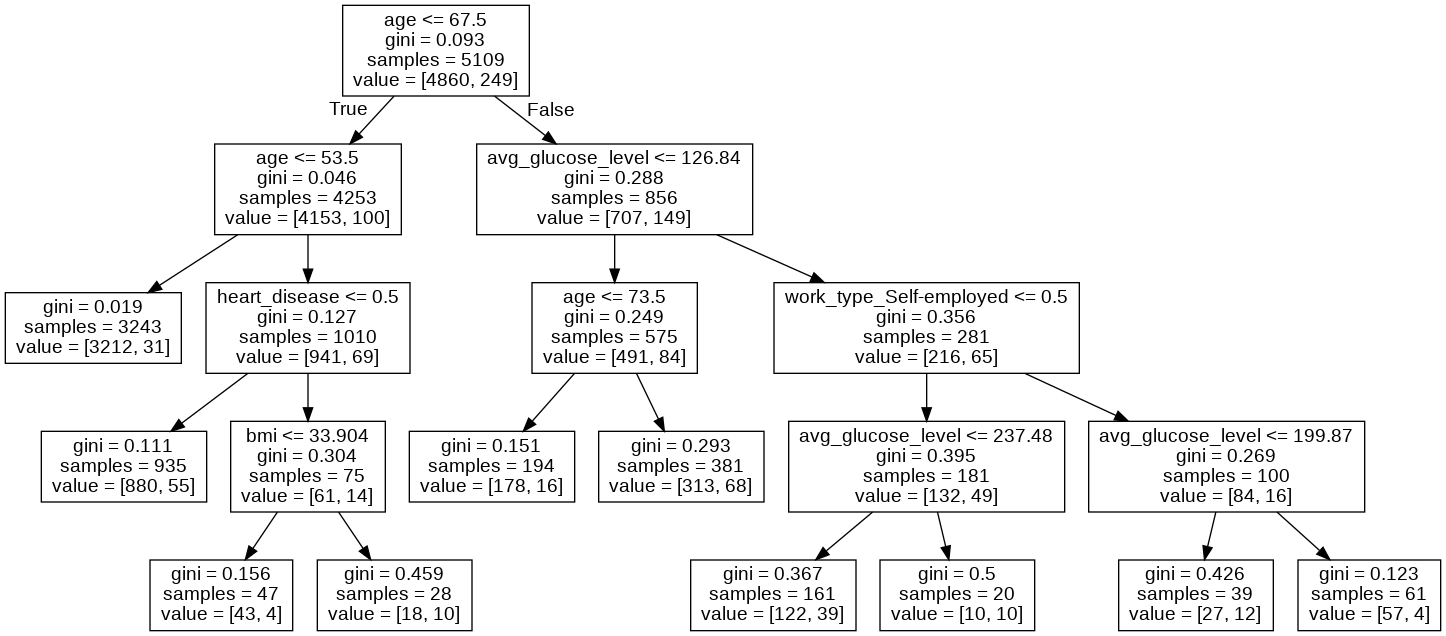

In [ ]:
#create tree
stroke_tree = DecisionTreeClassifier(max_depth=4,min_samples_leaf=15).fit(df, y)

#cross validation, get best tree
param_grid={'max_depth': [3,4,5,6,7]
            , 'min_samples_leaf': [5,10,15,20,25,30,35,40]
            , 'max_leaf_nodes': [5,10,15,20,25,30,35,40]}
cv_search = GridSearchCV(stroke_tree, param_grid).fit(df, y)
best_tree = cv_search.best_estimator_

#display tree
dot_data = export_graphviz(best_tree,feature_names=df.columns)
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_graphviz")

Image('decision_tree_graphviz.png')

####Analysis

This is where the analysis would go!

###Using Trees

####Decision Tree

In [ ]:
#create tree
stroke_tree = DecisionTreeClassifier(max_depth=4,min_samples_leaf=15).fit(df, y)

#cross validation, get best tree
param_grid={'max_depth': [3,4,5,6,7]
            , 'min_samples_leaf': [5,10,15,20,25,30,35,40]
            , 'max_leaf_nodes': [5,10,15,20,25,30,35,40]}
cv_search = GridSearchCV(stroke_tree, param_grid).fit(df, y)
best_tree = cv_search.best_estimator_

In [ ]:
y_pred = best_tree.predict(df)
recall_score(y, y_pred)

0.0

####Random Forest

## Results Using K-Nearest Neighbor Classifier
<img src = 'KNN.png'>


## Results Using Naive Bayes Classifier
<img src = 'NB.png'>

## Analysis of Learning Algorithms:

We tried a variety of classifiers in an attempt to create a model that could accurately (and more importantly, with high recall) predict stroke occurances using the health data provided. One important characteristic of our dataset is that it is heavily imbalanced. The null hypothesis (predicting no stroke occurances across the board) results in a model with about 95% accuracy. Thus, it is extremely important that we focus on the recall of the model and the f1 scores, which represent a sort of balance between the accuracy and the recall scores. Experimentally, raising a model's recall by changing model parameters or using SMOTE to oversample the training data results in a lowering of the accuracy so there is a practical trade-off between the two scores. However, the null hypothesis model is quite obviously useless so it's a trade-off we need to make in order to get any kind of applicable model.

Treating the natural imbalance in the data is of utmost importance. The Syntethic Minority Oversampling Technique (SMOTE) is used to take the minority class (in this case, stroke occurances) and creating fake examples that are close to the other stroke occurances in the feature space. In all of our attempted models, oversampling with SMOTE greatly improves both recall and the f1 score from the corresponding baseline model that was trained only on the provided data. Regardless of the classifier type, the models were effectively useless without oversampling. Thus, the most important step in model creation for our dataset is using SMOTE in our pipeline. We also played around with other preprocessing steps such as using sklearn's StandardScaler, but this reduces the scoring of our models across the board.

Only two of the provided features are continuous/numerical, so Gaussian Discriminant Analysis was not an appropriate tool to use due to the fact that it assumes that the features are normally distributed. Instead, we turned to Naive Bayes as a potential model because it can handle both Gaussian and Binary distributed features. Due to the fact that Naive Bayes assumes independence between the features, we can split the dataset into Gaussian and Bernoulli features and get final probabilities at the end by multiplying the probabilities of the two separate models together. For each of the sets, we can train a Naive Bayes model of the corresponding type on just the appropriate features. Then, rather than using the predict method to get labels, we grab the probabilities for each class. Multiplying these newly calculated probabilities together from both the Gaussian and Bernoulli models, we get a "combined" probability that accounts for all of the features in the data. Then, assigning class labels is as easy as choosing the argmax of the resultant probabilities for each input. In addition to being theoretically sound (by the assumed independence of features), we experimentally see that the combined model improves on the f1 scores of both subset models. Using this combined model (w/ SMOTE), we end up with a recall of $0.65$, an accuracy of $0.79$, and an f1 of around $0.24$. Unfortunately, there aren't a whole lot of model parameters that can be changed for the Naive Bayes model. The only possiblity being "var_smoothing" which is just used for calculation stability on GaussianNB and "alpha" a smoothing parameter for BernoulliNB. Thus, the best we can do with Naive Bayes is an f1 score of $0.24$. 

Another option we explored as a way to predict stroke occurances was a K-Nearest Neighbors Classifier. Without SMOTE or any fine tuning of parameters, the model is useless with a recall score around $.01$ and an f1 score of about $0.02$. Oversampling immediately yields much better results with a recall score of about $0.51$, an accuracy of $0.79$, and an f1 score of around $0.19$ which is actually already decent compared to our scores on the Naive Bayes. Unfortunately, the tuning of model parameters using GridSearch doesn't improve the SMOTE model significantly. It provides a slight jump up to a recall of $.59$, a slight accuracy decrease to $.78$, and a slight jump up to a f1 score of about $.21$. Thus, even with all the improvements we could make with our KNN classifier, it underperforms when compared to the combined Naive Bayes model we talked about previously.

# Ethical Implications

The ethics of using modeling and machine learning techniques in medical diagnostics have been debated since the idea of using computers to diagnose humans has been around. One major issue is informed consent [6]. If a doctor uses a model to diagnose a patient, would the doctor have to give a lesson on linear regression so the patient understands where the diagnosis came from? This is of course impractical, but neglecting to inform the patient leads to uniformed consent. This is closely related to the transparency of the model [6]. Most likely, if a model is accepted as a good predictor of stroke, the creators of the model would want to profit off of it, meaning the algorithm would be kept in a black-box. This would make it difficult to determine if the algorithm is bias in any way. 

One major falacy in terms of models is that the features cause the outcome when really the model tells us that the features are correlated with the outcome. While our analysis does try to determine which features are correlated with stroke, the doctor and patient could interpret this as those features leading to stroke. With this in mind, the features that were found to be more correlated with stroke in this project should not determine a plan for a patient. That should ultimately be up to the doctor, who can choose to take correlation into consideration.


## References
[1] “Stroke Facts.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 25 May 2021, https://www.cdc.gov/stroke/facts.htm#:~:text=Someone%20in%20the%20United%20States,minutes%2C%20someone%20dies%20of%20stroke.&amp;text=Every%20year%2C%20more%20than%20795%2C000,are%20first%20or%20new%20strokes. 

[2] Min S, N, Park S, J, Kim D, J, Subramaniyam M, Lee K, -S: Development of an Algorithm for Stroke Prediction: A National Health Insurance Database Study in Korea. Eur Neurol 2018;79:214-220. doi: 10.1159/000488366

[3] Chien, Kuo-Liong, et al. “Constructing the Prediction Model for the Risk of Stroke in a Chinese Population.” Stroke, American Heart Association, 29 July 2010, www.ahajournals.org/doi/full/10.1161/STROKEAHA.110.586222. 

[4] Wang, Wenjuan, et al. “A Systematic Review of Machine Learning Models for Predicting Outcomes of Stroke with Structured Data.” PloS One, Public Library of Science, 12 June 2020, www.ncbi.nlm.nih.gov/pmc/articles/PMC7292406/. 

[5] https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

[6] Gerke, Sara, et al. “Ethical and Legal Challenges of Artificial Intelligence-Driven Healthcare.” Edited by Adam Bohr and Kaveh Memarzadeh, Artificial Intelligence in Healthcare, U.S. National Library of Medicine, 26 June 2020, www.ncbi.nlm.nih.gov/pmc/articles/PMC7332220/. 

[7] https://github.com/CaymanWilliams/StrokeProject.git
